# Customer Churn Predictive Model

## Overview

In this dataset each row represents a customer, each column contains customer’s attributes: \
the meaning of each column: 
+ **customerID**: Customer ID
- **gender**: Whether the customer is a male or a female
- **SeniorCitizen**: Whether the customer is a senior citizen or not (1, 0)
- **Partner**: Whether the customer has a partner or not (Yes, No)
- **Dependents**: Whether the customer has dependents or not (Yes, No)
- **tenure**: Number of months the customer has stayed with the company
- **PhoneService**: Whether the customer has a phone service or not (Yes, No)
- **MultipleLines**: Whether the customer has multiple lines or not (Yes, No, No phone service)
- **InternetService**: Customer’s internet service provider (DSL, Fiber optic, No)
- **OnlineSecurity**: Whether the customer has online security or not (Yes, No, No internet service)
- **OnlineBackup**: Whether the customer has online backup or not (Yes, No, No internet service)
- **DeviceProtection**: Whether the customer has device protection or not (Yes, No, No internet service)
- **TechSupport**: Whether the customer has tech support or not (Yes, No, No internet service)
- **StreamingTV**: Whether the customer has streaming TV or not (Yes, No, No internet service)
- **StreamingMovies**: Whether the customer has streaming movies or not (Yes, No, No internet service)
- **Contract**: The contract term of the customer (Month-to-month, One year, Two year)
- **PaperlessBilling**: Whether the customer has paperless billing or not (Yes, No)
- **PaymentMethod**: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic)
- **MonthlyCharges**: The amount charged to the customer monthly
- **TotalCharges**: The total amount charged to the customer
- **Churn**: Whether the customer churned or not (Yes or No)

In [32]:
# importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

## Data Preparation

In [8]:
# load the data 
data = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
data.shape

(7043, 21)

## Exploratory Data Analysis

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
data['gender'].value_counts(normalize=True)

Male      0.504756
Female    0.495244
Name: gender, dtype: float64

notice here that the 'Male' and 'Female' are almost equal, \
    hence the **gender** is uniformly distributed

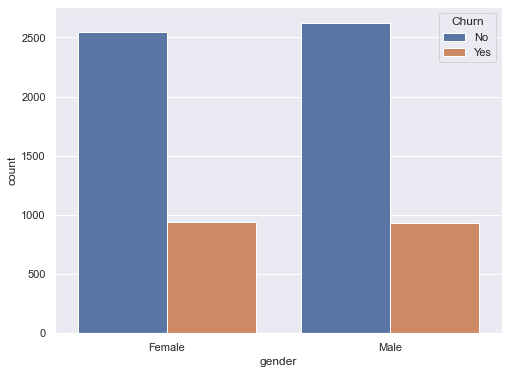

In [36]:
plt.figure(figsize=(8,6))
sns.countplot(x='gender', hue='Churn', data=data)
plt.show()

notice here that the impact of a customer being a 'male' or 'female' is nothing

In [37]:
data['SeniorCitizen'].value_counts(normalize=True)

0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64

the precent of the customers that they senior citizens is 16%

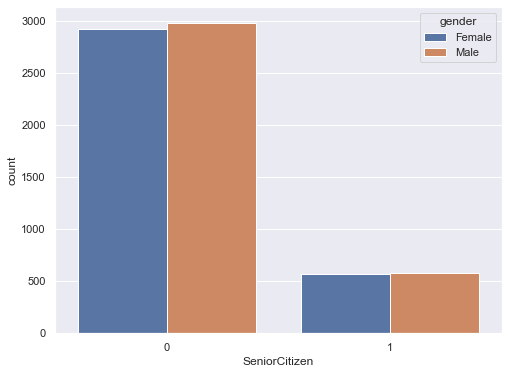

In [39]:
plt.figure(figsize=(8,6))
sns.countplot(x='SeniorCitizen', hue='gender', data=data)
plt.show()

also the older and young customers are uniformly distributed with being a male or female customer

In [46]:
data[['SeniorCitizen', 'Churn']].value_counts()

SeniorCitizen  Churn
0              No       4508
               Yes      1393
1              No        666
               Yes       476
dtype: int64

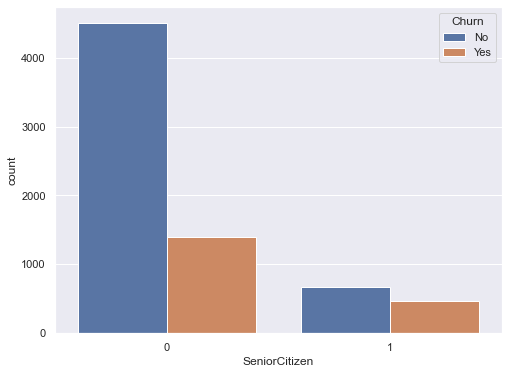

In [40]:
plt.figure(figsize=(8,6))
sns.countplot(x='SeniorCitizen', hue='Churn', data=data)
plt.show()

notice here that the younger customers have a higher precentage (+36%) of being not churn than the older customers
> why this happend?

In [50]:
data['Partner'].value_counts(normalize=True)

No     0.516967
Yes    0.483033
Name: Partner, dtype: float64

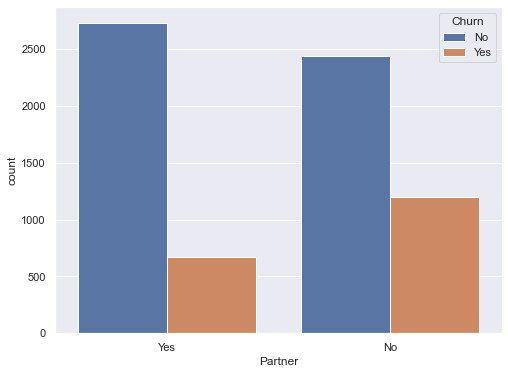

In [51]:
plt.figure(figsize=(8,6))
sns.countplot(x='Partner', hue='Churn', data=data)
plt.show()

the count of customers who doesn't have partners and did leave the service, \
    more than those who do have partners.
> **assumption**: maybe that means that having a partner may have a slighlty impact \
    for preventing the customer from leaving the service.